In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the Dataset "Financial_Transactions.csv" into a pandas DataFrame.

In [10]:
try:
    df = pd.read_csv('/content/sample_data/Financial_Transactions.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'KreditPe_Transactions.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Gender,Age,User_ID,Transaction_ID,Transaction_Amount,Transaction_Date,Transaction_Time,Merchant,Payment_Method,Cashback_Applied,Credit_Score,Loan_Approval,User_Engagement_Score,Fraud_Flag,Cashback_Received
0,Male,30,1011,T6837,1339,17-03-2025,03:04:25,Flipkart,Credit Card,Yes,572,Rejected,50,No,26.78
1,Male,21,1023,T2546,1253,05-03-2025,06:59:01,Zomato,UPI,Yes,733,Approved,91,No,12.53
2,Female,26,1059,T9509,837,01-03-2025,15:43:52,Paytm Mall,UPI,No,585,Rejected,86,No,8.37
3,Male,38,1089,T6364,3148,17-03-2025,06:49:08,OLA,UPI,No,722,Approved,51,No,31.48
4,Female,56,1045,T8705,3872,14-03-2025,17:13:08,BigBasket,UPI,Yes,787,Approved,67,No,38.72


# Step 2: Data Cleaning & Preprocessing

In [11]:
# Check for missing values
print(df.isnull().sum())

Gender                   0
Age                      0
User_ID                  0
Transaction_ID           0
Transaction_Amount       0
Transaction_Date         0
Transaction_Time         0
Merchant                 0
Payment_Method           0
Cashback_Applied         0
Credit_Score             0
Loan_Approval            0
User_Engagement_Score    0
Fraud_Flag               0
Cashback_Received        0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 500 non-null    object 
 1   Age                    500 non-null    int64  
 2   User_ID                500 non-null    int64  
 3   Transaction_ID         500 non-null    object 
 4   Transaction_Amount     500 non-null    int64  
 5   Transaction_Date       500 non-null    object 
 6   Transaction_Time       500 non-null    object 
 7   Merchant               500 non-null    object 
 8   Payment_Method         500 non-null    object 
 9   Cashback_Applied       500 non-null    object 
 10  Credit_Score           500 non-null    int64  
 11  Loan_Approval          500 non-null    object 
 12  User_Engagement_Score  500 non-null    int64  
 13  Fraud_Flag             500 non-null    object 
 14  Cashback_Received      500 non-null    float64
dtypes: flo

In [13]:
# Convert categorical features to categorical data type
categorical_features = ['Transaction_ID', 'Payment_Method', 'Merchant','Gender']
for feature in categorical_features:
    df[feature] = pd.Categorical(df[feature])

In [14]:
# Ensure numerical columns are in the correct format to prevent errors in calculation
# Allows numeric operations like mean(), median(), and std()

df['Transaction_Amount'] = df['Transaction_Amount'].astype(float)

In [15]:
# Convert boolean features to boolean data type
df['Cashback_Applied'] = df['Cashback_Applied'].map({'Yes': True, 'No': False})
df['Loan_Approval'] = df['Loan_Approval'].map({'Approved': True, 'Rejected': False})
df['Fraud_Flag'] = df['Fraud_Flag'].map({'Yes': True, 'No': False})

In [16]:
# Display data types after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gender                 500 non-null    category
 1   Age                    500 non-null    int64   
 2   User_ID                500 non-null    int64   
 3   Transaction_ID         500 non-null    category
 4   Transaction_Amount     500 non-null    float64 
 5   Transaction_Date       500 non-null    object  
 6   Transaction_Time       500 non-null    object  
 7   Merchant               500 non-null    category
 8   Payment_Method         500 non-null    category
 9   Cashback_Applied       500 non-null    bool    
 10  Credit_Score           500 non-null    int64   
 11  Loan_Approval          500 non-null    bool    
 12  User_Engagement_Score  500 non-null    int64   
 13  Fraud_Flag             500 non-null    bool    
 14  Cashback_Received      500 non-null    flo

## Checking for duplicate transactions

In [17]:
# Define columns to check for duplicates
duplicate_cols = ['User_ID', 'Transaction_Amount', 'Merchant', 'Transaction_Date']

# Find duplicates based on selected columns
possible_duplicates = df[df.duplicated(subset=duplicate_cols, keep=False)]

# Check if any duplicates were found
if possible_duplicates.empty:
    # If no duplicates, create a DataFrame with 'null'
    result_df = pd.DataFrame([{'Result': 'null'}])
else:
    # If duplicates found, assign possible_duplicates to result_df
    result_df = possible_duplicates

# Display the result
display(result_df)

,Result
0,null


**No Duplicate Transactions found**

# Step 3: Exploratory Data Analysis (EDA)

### Subtask:
Explore the transaction data to understand its structure and identify the transaction timestamp column.


**Reasoning**:
Identify the transaction timestamp column and explore its granularity by examining the data.



In [18]:
# Print the shape and descriptive statistics of the timestamp column
print(f"Shape of the data: {df.shape}")
print(f"Descriptive statistics of {'Transaction_Date'}:")
print(df['Transaction_Date'].describe())
print(f"Descriptive statistics of {'Transaction_Time'}:")
print(df['Transaction_Time'].describe())

Shape of the data: (500, 15)
Descriptive statistics of Transaction_Date:
count            500
unique            31
top       14-03-2025
freq              24
Name: Transaction_Date, dtype: object
Descriptive statistics of Transaction_Time:
count          500
unique         499
top       14:29:02
freq             2
Name: Transaction_Time, dtype: object


**Reasoning**:
Based on the output, 'Transaction_Date' and 'Transaction_Time' seem to be the timestamp columns. We can combine these columns to create a datetime column for further analysis.


In [19]:
# Enables functions like month(), year(), day(), hour() for deeper insights.
# Ensures correct sorting and comparisons

# Combine 'Transaction_Date' and 'Transaction_Time' into a datetime column
df['Transaction_DateTime'] = pd.to_datetime(df['Transaction_Date'] + ' ' + df['Transaction_Time'])

# Print the shape and descriptive statistics of the new datetime column
print(f"Shape of the data: {df.shape}")
print(f"Descriptive statistics of Transaction_DateTime:")
print(df['Transaction_DateTime'].describe())

Shape of the data: (500, 16)
Descriptive statistics of Transaction_DateTime:
count                              500
mean     2025-03-15 19:28:38.886000128
min                2025-03-01 02:03:06
25%      2025-03-08 14:36:24.750000128
50%                2025-03-14 23:03:34
75%                2025-03-23 03:10:54
max                2025-03-31 21:46:59
Name: Transaction_DateTime, dtype: object




## Data analysis

### Subtask:
Analyze transaction counts by hour to identify peak transaction times.


**Reasoning**:
Extract the hour from the `Transaction_DateTime` column, group by hour and count transactions, sort in descending order, and store results in `df_hourly_transactions`.



In [20]:
# Extract the hour from the Transaction_DateTime column
df['hour'] = df['Transaction_DateTime'].dt.hour

# Group transactions by hour and count the number of transactions in each hour
df_hourly_transactions = df.groupby('hour').size().reset_index(name='transaction_count') #Converts the grouped data from a Series to a DataFrame. The new column is named 'transaction_count', making it more readable.

# Sort the counts in descending order
df_hourly_transactions = df_hourly_transactions.sort_values('transaction_count', ascending=False)

# Display the resulting DataFrame
display(df_hourly_transactions)

,hour,transaction_count
10,10,39
14,14,38
13,13,36
12,12,36
9,9,34
15,15,32
16,16,26
8,8,26
11,11,25
6,6,25


# Data visualization

### Subtask:
Visualize the hourly transaction counts to identify peak transaction times.


**Reasoning**:
Visualize the hourly transaction counts using a bar chart to identify peak transaction times.



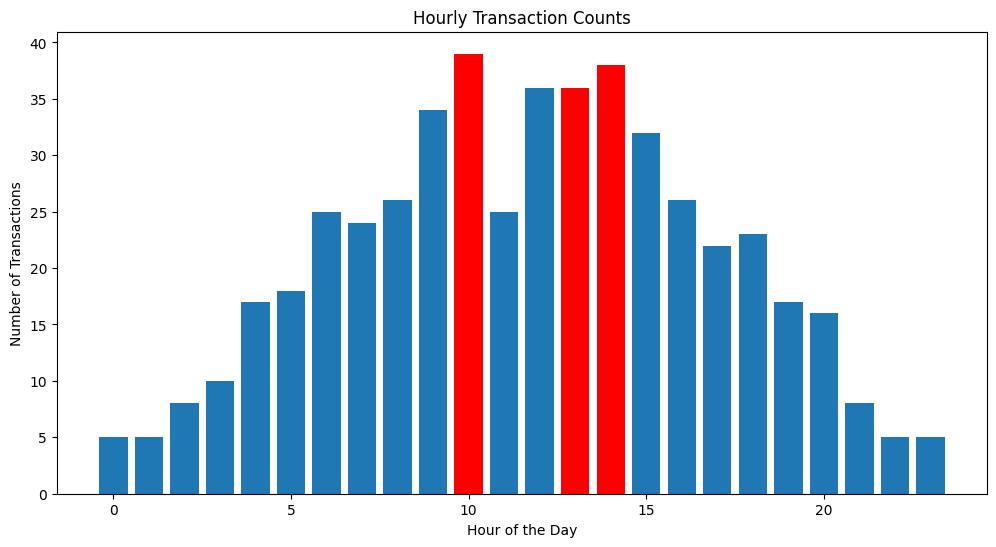

In [21]:
# Create a bar chart of hourly transaction counts
plt.figure(figsize=(12, 6))
plt.bar(df_hourly_transactions['hour'], df_hourly_transactions['transaction_count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Transaction Counts')

# Highlight peak transaction times (e.g., top 3 hours)
peak_hours = df_hourly_transactions.nlargest(3, 'transaction_count')['hour'].tolist()
for hour in peak_hours:
  plt.bar(hour, df_hourly_transactions[df_hourly_transactions['hour'] == hour]['transaction_count'].values[0], color='red')

plt.show()

**Interpretation:**

The peak hours are clustered around 10 AM, 1 PM, and 2 PM, it might suggest that:

* Customers might be more likely to make transactions during their lunch break or after work.
* It might be worthwhile to allocate more resources to handle customer inquiries during these times.
* The company might consider offering special promotions or deals during these hours to maximize sales.


In [ ]:
Total_Cashback_Received = df["Cashback_Received"].sum()
print(f"Total Cashback Received: Rs {Total_Cashback_Received}")

Total Cashback Received: Rs 19440.370000000003


In [ ]:
df['User_ID'].unique()

array([1011, 1023, 1059, 1089, 1045, 1009, 1028, 1003, 1049, 1058, 1050,
       1047, 1013, 1092, 1098, 1077, 1032, 1030, 1084, 1096, 1037, 1005,
       1029, 1040, 1055, 1012, 1071, 1036, 1017, 1046, 1079, 1033, 1097,
       1070, 1007, 1034, 1085, 1075, 1048, 1018, 1074, 1066, 1006, 1001,
       1072, 1095, 1015, 1056, 1087, 1065, 1083, 1060, 1094, 1039, 1064,
       1068, 1080, 1038, 1035, 1091, 1100, 1090, 1042, 1053, 1021, 1088,
       1004, 1069, 1027, 1093, 1002, 1010, 1099, 1014, 1016, 1025, 1057,
       1024, 1081, 1008, 1041, 1054, 1073, 1061, 1063, 1076, 1020, 1086,
       1019, 1062, 1026, 1044, 1051, 1043, 1082, 1078, 1031, 1052])

In [22]:
df['User_ID'].nunique()

98

## Identifying the top users
Step 1: Group by User_ID and count transactions

In [23]:
transaction_counts = df.groupby('User_ID')['Transaction_ID'].count().reset_index()
transaction_counts.rename(columns={'Transaction_ID': 'Transaction_Count'}, inplace=True)
top_10_users = transaction_counts.sort_values(by='Transaction_Count', ascending=False).head(10)

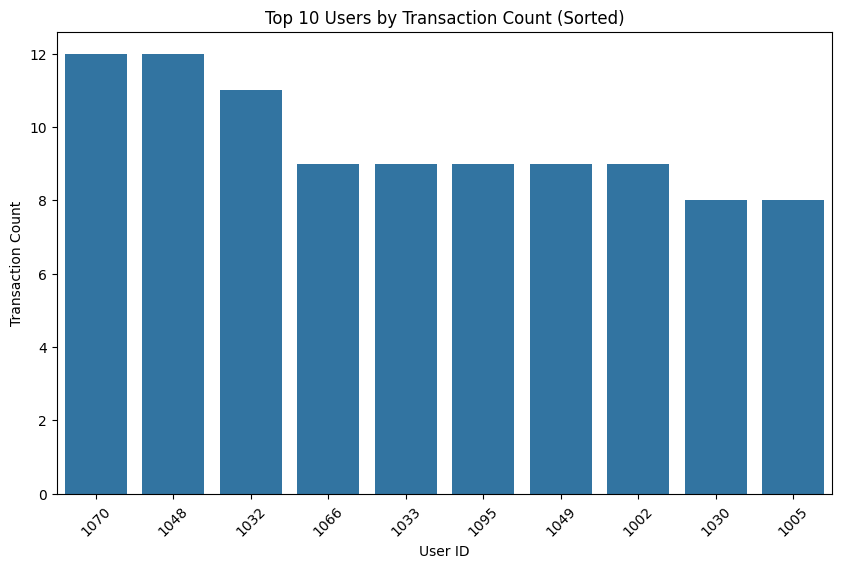

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Sort the bars in descending order within the plot
sns.barplot(x='User_ID', y='Transaction_Count', data=top_10_users, order=top_10_users.sort_values('Transaction_Count', ascending=False)['User_ID'])
plt.title('Top 10 Users by Transaction Count (Sorted)')
plt.xlabel('User ID')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

**We can give some good offers for the most loyal customers**

## Identifying the top Merchants

In [ ]:
df['Merchant'].nunique()

9

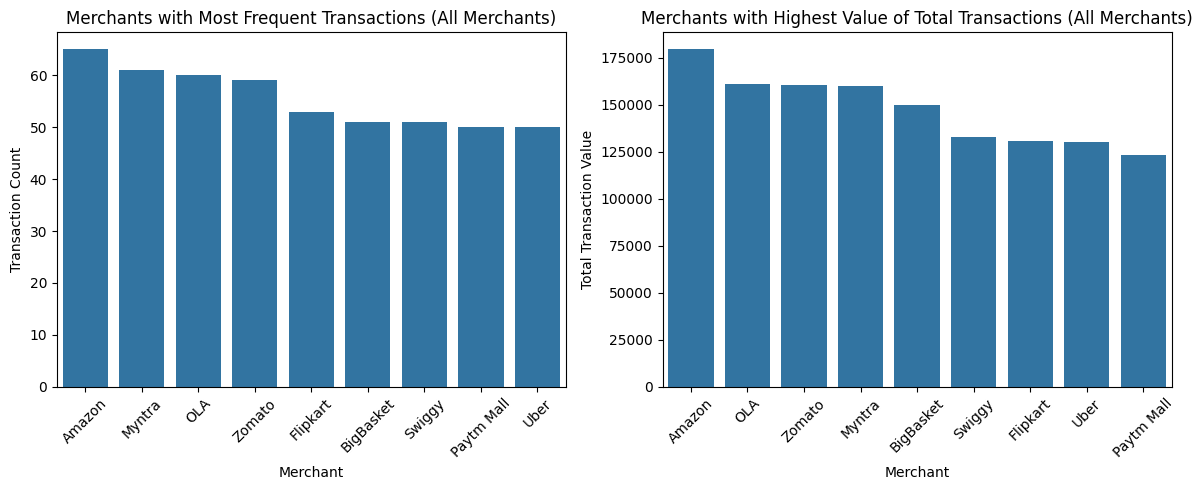

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top Merchants with Most Frequent Transactions (All Merchants in Descending Order)
merchant_frequency = df.groupby('Merchant')['Transaction_ID'].count().reset_index()
merchant_frequency.rename(columns={'Transaction_ID': 'Transaction_Count'}, inplace=True)
merchant_frequency = merchant_frequency.sort_values(by='Transaction_Count', ascending=False)  # Sort all merchants

# Top Merchants with Highest Value of Total Transactions (All Merchants in Descending Order)
merchant_value = df.groupby('Merchant')['Transaction_Amount'].sum().reset_index()
merchant_value.rename(columns={'Transaction_Amount': 'Total_Transaction_Value'}, inplace=True)
merchant_value = merchant_value.sort_values(by='Total_Transaction_Value', ascending=False)  # Sort all merchants

# Create Charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns of charts

# Chart 1: Most Frequent Transactions (All Merchants)
sns.barplot(x='Merchant', y='Transaction_Count', data=merchant_frequency, order=merchant_frequency['Merchant'], ax=axes[0])  # Use order for sorting
axes[0].set_title('Merchants with Most Frequent Transactions (All Merchants)')
axes[0].set_xlabel('Merchant')
axes[0].set_ylabel('Transaction Count')
axes[0].tick_params(axis='x', rotation=45)

# Chart 2: Highest Value of Total Transactions (All Merchants)
sns.barplot(x='Merchant', y='Total_Transaction_Value', data=merchant_value, order=merchant_value['Merchant'], ax=axes[1])  # Use order for sorting
axes[1].set_title('Merchants with Highest Value of Total Transactions (All Merchants)')
axes[1].set_xlabel('Merchant')
axes[1].set_ylabel('Total Transaction Value')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
### Analysing Gender and Age Columns

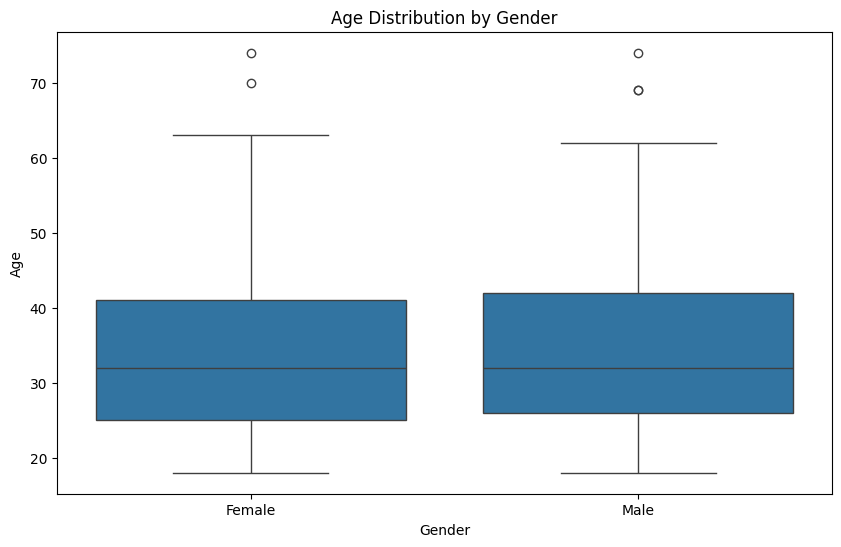

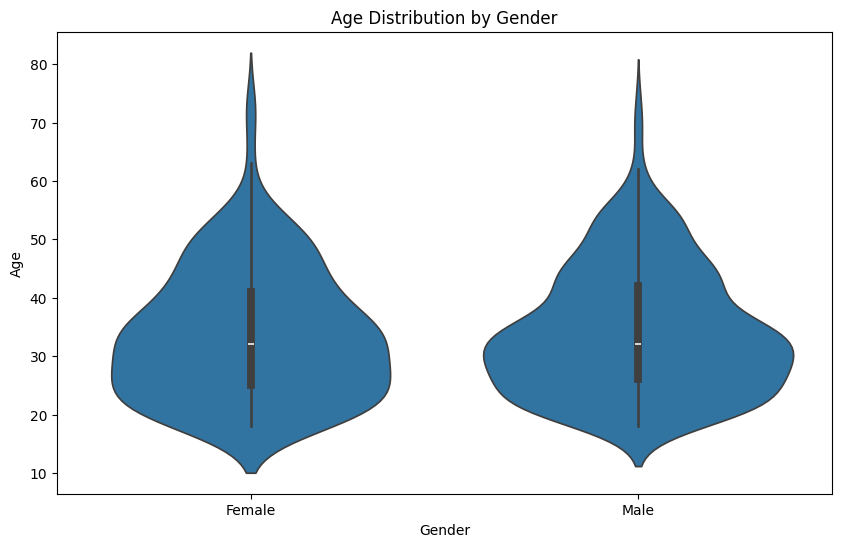

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Or a violin plot for a more detailed view of the distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


# prompt: what does the above graphs generated by you tell

Okay, let's analyze the graphs and insights generated by the provided code:


**1. Hourly Transaction Counts:**

* **Peak Transaction Times:** The bar chart shows that the peak transaction hours are around 10 AM, 1 PM, and 2 PM.
* **Interpretation:** This suggests that customers are more active during lunch breaks or possibly after work. It implies that these are prime times for potential promotions or targeted marketing efforts to maximize sales.
* **Resource Allocation:**  It also indicates that the company may need to allocate more resources to handle customer support and inquiries during these peak hours.


**2. Top 10 Users by Transaction Count:**

* **User Loyalty:** The bar chart identifies the 10 users with the highest number of transactions.
* **Interpretation:** These users can be considered the most loyal customers. The company might benefit from targeted loyalty programs, exclusive offers, or feedback requests to further retain and engage them.


**3. Top Merchants by Transaction Count and Value:**

* **Merchant Performance:** The bar charts show two perspectives on merchant performance:
    * Merchants with the most frequent transactions (total transaction count).
    * Merchants with the highest total transaction value.
* **Interpretation:**
    * Merchants appearing high on both charts are likely the most successful and popular.
    * Companies can study these top-performing merchants' strategies for potential expansion or improvement across other merchants.
    * Further analysis on these merchants can reveal useful insights into marketing campaigns, product offerings, and customer preferences.

**4. Age Distribution by Gender:**

* **Gender & Age:** The box plots (or violin plots) show the age distribution for different genders.
* **Interpretation:** By analyzing the median, quartiles, and potential outliers for each gender, you can infer demographic trends. For example, you might discover that a specific age group of males or females tends to be more active in transactions.
* **Targeted Marketing:** This analysis can help create targeted marketing campaigns or product offerings tailored to specific demographics.


**Overall Insights:**


* **Peak Transaction Hours:** Identify periods of high activity for optimizing resource allocation and marketing campaigns.
* **Loyal Customers:** Recognize and engage the most valuable customers for improved retention and sales.
* **Merchant Performance:** Understand top-performing merchants to gain insights into successful strategies and potentially enhance performance across other merchants.
* **Customer Demographics:** Analyze age and gender distributions to tailor marketing and product offerings for different customer segments.


By examining these graphs and insights together, you can gain a deeper understanding of customer behavior, identify areas for improvement, and develop strategies to optimize business performance and revenue generation.


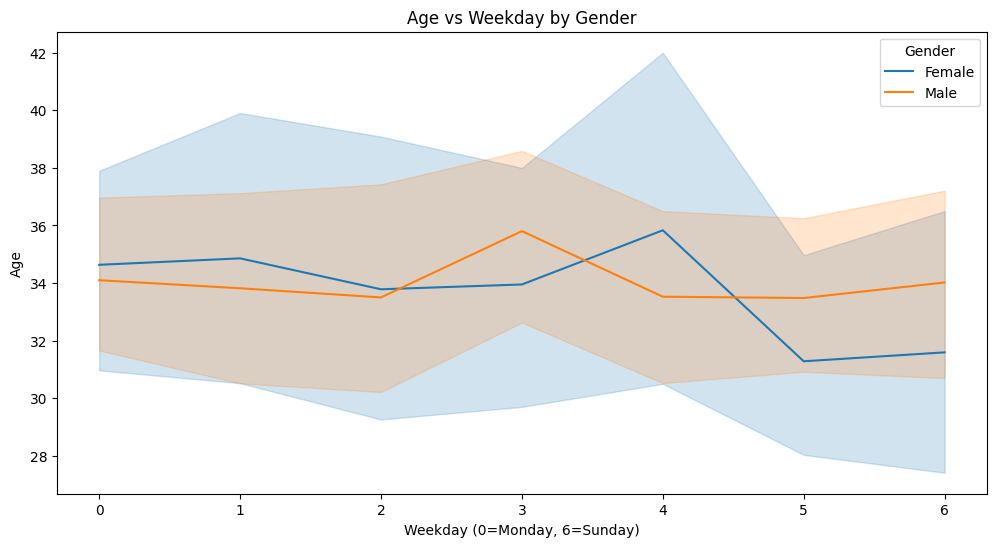

In [28]:
# prompt: give line chart of age and gender VS weekdays and interpret the graph in words

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and contains 'Transaction_DateTime', 'Gender', and 'Age' columns
# You'll need to adapt this code to your specific DataFrame structure.

# Convert 'Transaction_DateTime' to a datetime object if it's not already
df['Transaction_DateTime'] = pd.to_datetime(df['Transaction_DateTime'])

# Extract the weekday from the 'Transaction_DateTime' column
df['Weekday'] = df['Transaction_DateTime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Create a line chart of Age vs Weekday for each Gender
plt.figure(figsize=(12, 6))
sns.lineplot(x='Weekday', y='Age', hue='Gender', data=df)
plt.title('Age vs Weekday by Gender')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Age')
plt.show()





Interpretation:
The graph demonstrates how the average age of customers varies throughout the week, segmented by gender.

Possible insights from the graph:

1. Gender Differences:
 - If there are significant differences in average age between genders on particular weekdays,
 - it could indicate varying preferences or patterns based on gender.

2. Age Trends:
 - The trend in average age on different days can reveal insights into potential customer segments
 - that are more active on specific days of the week.

3. Outliers:
 - Pay attention to any sharp spikes or dips in the lines, which could highlight unexpected trends or patterns.


You can further analyze this graph by looking at specific weekdays and examining
 the average age differences between genders. This can help identify actionable insights.

# Machine Learning Model implementation for fraud detection


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Step 4: Feature Engineering and Selection
# Assuming 'Fraud_Flag' is your target variable
X = df.drop(['Fraud_Flag', 'Transaction_Date', 'Transaction_Time', 'Transaction_DateTime'], axis=1)
y = df['Fraud_Flag']

# Define categorical and numerical features
categorical_features = ['Payment_Method', 'Merchant', 'Transaction_ID', 'User_ID']  # Include all object type columns
numerical_features = X.select_dtypes(include=['number']).columns.tolist()  # Select numerical columns

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),  # One-hot encode categorical features
    ])

# Step 5: Model Selection and Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to combine preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression()),
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 7: Model Deployment and Monitoring (Optional)
# You can deploy the trained model to predict fraud in real-time transactions.
# Monitor the model's performance and retrain it as needed.

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

       False       0.97      1.00      0.98        91
        True       1.00      0.67      0.80         9

    accuracy                           0.97       100
   macro avg       0.98      0.83      0.89       100
weighted avg       0.97      0.97      0.97       100


Confusion Matrix:
 [[91  0]
 [ 3  6]]



**Overall Performance:**

* **Accuracy:**  The model achieved a certain level of accuracy (97%) . Accuracy is the overall proportion of correctly classified instances.
* **Precision:** It tells us what proportion of predicted positive cases are truly positive. A high precision means that when the model predicts something as positive, it's likely to be correct.
* **Recall (Sensitivity):** It tells us what proportion of actual positive cases are correctly identified by the model. A high recall means that the model is good at finding all the positive instances.
* **F1-score:** It's the harmonic mean of precision and recall, providing a balanced measure of the model's performance. It is useful when there is an uneven class distribution.
